In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("wordsforthewise/lending-club")

print("Path to dataset files:", path)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.26G/1.26G [03:51<00:00, 5.87MB/s]

Extracting files...


Path to dataset files: /Users/abhaypratapsingh/.cache/kagglehub/datasets/wordsforthewise/lending-club/versions/3


In [2]:
##Python Core Utility Modules

import os
import sys

In [3]:
##Analysis Libraries

import pandas as pd
import numpy as np

In [4]:
## ML Libraries

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [5]:
#2260701

In [6]:
#os.remove(path+'/'+'rejected_2007_to_2018Q4.csv.gz')
#os.remove(path+'/'+'accepted_2007_to_2018Q4.csv.gz')

In [7]:
df=pd.read_csv('/Users/abhaypratapsingh/.cache/kagglehub/datasets/wordsforthewise/lending-club/versions/3/accepted_2007_to_2018q4.csv')

/var/folders/8y/pr6d07_x5rdgsfmfspvr1d300000gn/T/ipykernel_64147/1281624312.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/Users/abhaypratapsingh/.cache/kagglehub/datasets/wordsforthewise/lending-club/versions/3/accepted_2007_to_2018q4.csv')


In [8]:
df2=pd.read_csv('/Users/abhaypratapsingh/.cache/kagglehub/datasets/wordsforthewise/lending-club/versions/3/rejected_2007_to_2018Q4.csv')

In [9]:
df.info

<bound method DataFrame.info of                                                        id  member_id  \
0                                                68407277        NaN   
1                                                68355089        NaN   
2                                                68341763        NaN   
3                                                66310712        NaN   
4                                                68476807        NaN   
...                                                   ...        ...   
2260696                                          88985880        NaN   
2260697                                          88224441        NaN   
2260698                                          88215728        NaN   
2260699  Total amount funded in policy code 1: 1465324575        NaN   
2260700   Total amount funded in policy code 2: 521953170        NaN   

         loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0           3600.0       3600

In [10]:
df2.columns

Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')

<Axes: xlabel='loan_status'>

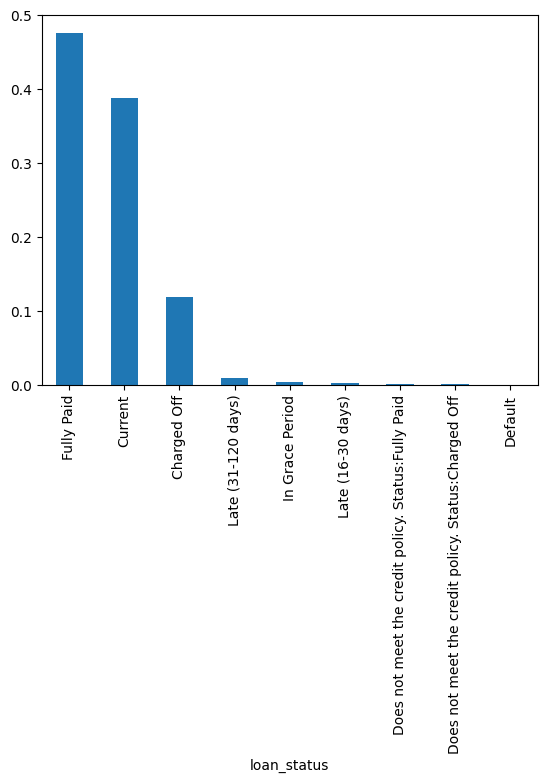

In [11]:
df['loan_status'].value_counts(normalize=True).plot(kind='bar')


In [12]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [13]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [14]:
def classify_features(df):
    categorical=[]
    non_categorical=[]
    continuous=[]
    discrete=[]

    for column in df.columns:
        if df[column].dtype=='object':
            if df[column].nunique() < 10:
                categorical.append(column)

            else:
                non_categorical.append(column)

        if df[column].dtype in ['int64','float64','float32','int32']:
            if df[column].nunique() < 30:
                discrete.append(column)
            else:
                continuous.append(column)
    return categorical,non_categorical,discrete,continuous

In [15]:
categorical_feat,non_categorical_feat,discrete_feat,continuous_feat=classify_features(df)

In [16]:
print('\033[1mcategorical_feat:',categorical_feat,"\n")
print('non_categorical_feat',non_categorical_feat,"\n")
print('discrete_feat',discrete_feat,"\n")
print('continuous_feat',continuous_feat,"\n")

categorical_feat: ['term', 'grade', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'initial_list_status', 'application_type', 'verification_status_joint', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag', 'settlement_status'] 

non_categorical_feat ['id', 'sub_grade', 'emp_title', 'emp_length', 'issue_d', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'sec_app_earliest_cr_line', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'debt_settlement_flag_date', 'settlement_date'] 

discrete_feat ['member_id', 'inq_last_6mths', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'open_acc_6m', 'open_il_12m', 'open_rv_12m', 'chargeoff_within_12_mths', 'mths_since_recent_inq', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'pub_rec_bankruptcies', 'sec_app_inq_last_6mths', 

In [17]:
df['loan_status']

0           Fully Paid
1           Fully Paid
2           Fully Paid
3              Current
4           Fully Paid
              ...     
2260696        Current
2260697    Charged Off
2260698        Current
2260699            NaN
2260700            NaN
Name: loan_status, Length: 2260701, dtype: object

In [18]:
df=df[df['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])]

In [19]:
df['loan_status']

0           Fully Paid
1           Fully Paid
2           Fully Paid
4           Fully Paid
5           Fully Paid
              ...     
2260688     Fully Paid
2260690     Fully Paid
2260691    Charged Off
2260692     Fully Paid
2260697    Charged Off
Name: loan_status, Length: 1345350, dtype: object

In [20]:
# Combine 'Charged Off' and 'Default' as one class (1 = Defaulted)
df['loan_default'] = df['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Default'] else 0)

/var/folders/8y/pr6d07_x5rdgsfmfspvr1d300000gn/T/ipykernel_64147/2705085077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_default'] = df['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Default'] else 0)


In [21]:
selected_features = [
    'term', 'grade', 'home_ownership', 'verification_status', 
    'annual_inc', 'loan_amnt', 'int_rate', 'dti', 
    'purpose', 'emp_length', 'revol_util', 'fico_range_low', 'fico_range_high'
]

In [22]:
df = df[selected_features + ['loan_default']].copy()
df.dropna(inplace=True)

In [23]:
df

,term,grade,home_ownership,verification_status,annual_inc,loan_amnt,int_rate,dti,purpose,emp_length,revol_util,fico_range_low,fico_range_high,loan_default
0,36 months,C,MORTGAGE,Not Verified,55000.0,3600.0,13.99,5.91,debt_consolidation,10+ years,29.7,675.0,679.0,0
1,36 months,C,MORTGAGE,Not Verified,65000.0,24700.0,11.99,16.06,small_business,10+ years,19.2,715.0,719.0,0
2,60 months,B,MORTGAGE,Not Verified,63000.0,20000.0,10.78,10.78,home_improvement,10+ years,56.2,695.0,699.0,0
4,60 months,F,MORTGAGE,Source Verified,104433.0,10400.0,22.45,25.37,major_purchase,3 years,64.5,695.0,699.0,0
5,36 months,C,RENT,Source Verified,34000.0,11950.0,13.44,10.20,debt_consolidation,4 years,68.4,690.0,694.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,60 months,B,OWN,Not Verified,130000.0,18000.0,9.49,20.59,home_improvement,5 years,34.0,735.0,739.0,0
2260690,60 months,C,MORTGAGE,Not Verified,180792.0,29400.0,13.99,22.03,debt_consolidation,9 years,85.2,705.0,709.0,0
2260691,60 months,C,MORTGAGE,Source Verified,157000.0,32000.0,14.49,10.34,home_improvement,3 years,27.4,735.0,739.0,1
2260692,60 months,C,RENT,Not Verified,150000.0,16000.0,12.79,12.25,medical,10+ years,55.0,665.0,669.0,0


In [24]:
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop('loan_default', axis=1)
y = df['loan_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Applying Logistics Regression#

In [26]:


clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[200953   2791]
 [ 46451   3008]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89    203744
           1       0.52      0.06      0.11     49459

    accuracy                           0.81    253203
   macro avg       0.67      0.52      0.50    253203
weighted avg       0.75      0.81      0.74    253203



/Users/abhaypratapsingh/Documents/tensorflow-metal/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Applying Support Vector Machine

In [27]:


#svm = SVC(kernel='linear', C=1.0)
#svm.fit(X_train, y_train)
#y_pred_svm = svm.predict(X_test)

#print(confusion_matrix(y_test, y_pred_svm))
#print(classification_report(y_test, y_pred_svm))


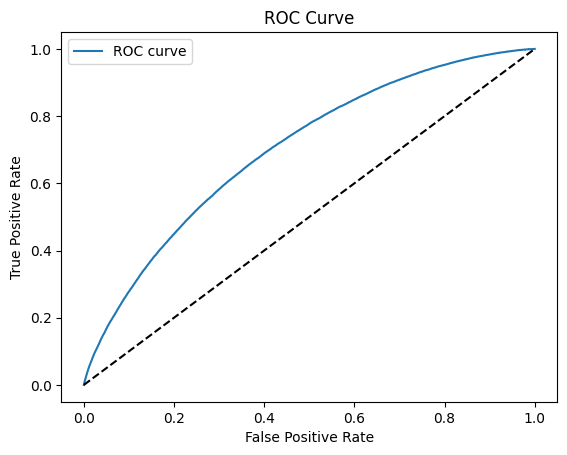

In [28]:
#Use accuracy, precision, recall, F1-score

#You can also visualize ROC-AUC:

y_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
